In [1]:
import numpy as np
import pandas as pd
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import folium

###### 한글 깨지는 것 막기
import matplotlib.font_manager as fm
# 폰트 이름 뽑기
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"]=False


# 플롯 스타일 
#plt.style.use("fivethirtyeight")

# 크롤링
# BeautifulSoup
from bs4 import BeautifulSoup
# urllib
import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
# Selenium 웹드라이버
from selenium import webdriver
import requests

# 에러 경고 안뜨게 하기
import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm_notebook

#중간중간 1초 정도 간격을 두고 다운로드 받도록 설정
import time

# pip install mglearn
import mglearn

# scikit-learn 샘플
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.neighbors import KNeighborsRegressor

# 훈련용 데이터와 테스트용 데이터를 알아서 분류해주는 라이브러리
from sklearn.model_selection import train_test_split

# Cross Validation KFold 
from sklearn.model_selection import KFold

# 예측값이 얼만큼 맞았는가 확인해주는 함수
from sklearn.metrics import accuracy_score

# 교차 검증 함수
from sklearn.model_selection import cross_val_score, cross_validate

# 교차 검증 및 하이퍼 파라미터 튜닝 함수
from sklearn.model_selection import GridSearchCV

In [79]:
transaction= pd.read_csv("C:/Users/dongz/OneDrive/문서/final_project/chsong/transaction_appended.csv")

In [80]:
transaction.head()

,Unnamed: 0,본번,부번,addr,load_addr,dong,bunji,floor,brand,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,load_name
0,0,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,4,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,3,1987,35,언주로 3
1,1,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,2,개포6차우성아파트1동~8동,79.97,1170000000,2018,1,8,1987,35,언주로 3
2,2,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,1,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,11,1987,35,언주로 3
3,3,652.0,0.0,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,서울특별시 강남구 개포동,652,12,개포우성3차,161.00,2100000000,2018,1,10,1984,38,개포로 307
4,4,12.0,2.0,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,서울특별시 강남구 개포동,12-2,16,개포자이(12-2),170.32,1620000000,2018,1,2,2004,18,개포로109길 69


In [96]:
transaction.describe()

,Unnamed: 0,본번,부번,floor,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,price2,build_area_round
count,281003.000000,280958.000000,280958.000000,281003.000000,281003.000000,2.810030e+05,281003.000000,281003.000000,281003.000000,281003.000000,281003.000000,2.726940e+05,281003.000000
mean,36129.434639,580.359541,6.324525,9.126230,77.711803,6.544092e+08,2019.160340,6.102205,15.834802,2000.334217,21.665783,7.226022e+08,77.762013
std,24022.919532,529.796621,47.829861,6.190694,30.751167,5.686751e+08,1.000405,3.478986,8.686803,9.747011,9.747011,4.101495e+08,30.747202
min,0.000000,0.000000,0.000000,-3.000000,10.020000,-2.144967e+09,2018.000000,1.000000,1.000000,1961.000000,1.000000,5.032704e+06,10.000000
25%,14416.000000,201.000000,0.000000,4.000000,59.670000,4.100000e+08,2018.000000,3.000000,8.000000,1994.000000,15.000000,4.200000e+08,60.000000
50%,33469.000000,481.000000,0.000000,8.000000,83.060000,6.100000e+08,2019.000000,6.000000,16.000000,2001.000000,21.000000,6.200000e+08,83.000000
75%,56885.500000,800.000000,1.000000,13.000000,84.970000,8.900000e+08,2020.000000,9.000000,23.000000,2007.000000,28.000000,9.000000e+08,85.000000
max,84224.000000,6040.000000,2837.000000,69.000000,395.060000,2.140000e+09,2021.000000,12.000000,31.000000,2021.000000,61.000000,2.140000e+09,395.000000


In [90]:
transaction["price2"]= transaction[transaction["price"]<0]["price"]*-1
transaction["price2"]= transaction[transaction["price"]>0]["price"]


In [97]:
transaction["price2"]

0         1.300000e+09
1         1.170000e+09
2         1.300000e+09
3         2.100000e+09
4         1.620000e+09
              ...     
280998    6.600000e+08
280999    6.600000e+08
281000    6.800000e+08
281001    3.000000e+08
281002    4.900000e+08
Name: price2, Length: 281003, dtype: float64

거래액 총액:  197.0 조원
대한민국 1년 예산 : 512조


<AxesSubplot:ylabel='Frequency'>

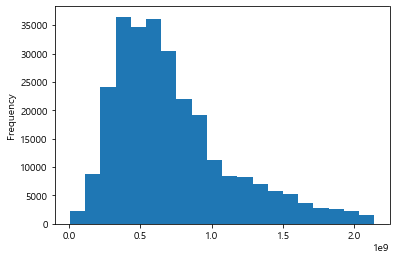

In [206]:
print("거래액 총액: ", round(transaction["price2"].sum()/1000000000000,0), "조원")
print("대한민국 1년 예산 : 512조")

transaction["price2"].plot.hist(bins=20)

[ 10.  87. 164. 241. 318. 395.]


<AxesSubplot:ylabel='Frequency'>

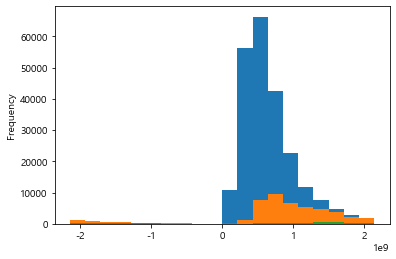

In [163]:
transaction["build_area_round"]= round(transaction["build_area"], 0)
bins= np.linspace(transaction["build_area_round"].min(), transaction["build_area_round"].max(), 6)
print(bins)

transaction["area_size"]= pd.cut(transaction["build_area_round"], labels=["x-small","small", "medium", "large", "x-large"], bins=bins, include_lowest=True)

transaction["area_size"].value_counts()


# 사이즈별 거래가격 히스토그램

transaction[transaction["area_size"]=="x-small"]["price"].plot.hist(bins=20)
transaction[transaction["area_size"]=="small"]["price"].plot.hist(bins=20)
transaction[transaction["area_size"]=="medium"]["price"].plot.hist(bins=20)
transaction[transaction["area_size"]=="large"]["price"].plot.hist(bins=20)
transaction[transaction["area_size"]=="x-large"]["price"].plot.hist(bins=20)

In [100]:
# 면적 크기 별 평균 거래가
mean_size= transaction["price2"].groupby(transaction["area_size"]).mean()

print("면적 크기 별 평균 거래가격(단위: 억원)\n", mean_size/100000000)


면적 크기 별 평균 거래가격(단위: 억원)
 area_size
x-small     6.553473
small      10.374416
medium     13.268828
large      13.430177
x-large          NaN
Name: price2, dtype: float64


In [101]:
# 사용년수 별 평균 거래가격
min_years= transaction["years_use"].min()
max_years= transaction["years_use"].max()

print(min_years, max_years)

bins=[0,5,10,15,20,25,61]
labels=["5년이하", "6년~10년이하", "11년~15년이하", "16년~20년이하", "21년~25년이하", "25년 초과"]

transaction["years_buckets"]=pd.cut(transaction["years_use"], bins=bins, labels=labels)

transaction["years_buckets"].value_counts()

1 61


25년 초과       89578
16년~20년이하    59300
21년~25년이하    59039
11년~15년이하    34170
6년~10년이하     26653
5년이하         12263
Name: years_buckets, dtype: int64

In [207]:
# 사용년수 별 거래가격 평균
print("사용년수 별 평균 거래가격(단위: 억원)\n", transaction["price2"].groupby(transaction["years_buckets"]).mean()/100000000)

사용년수 별 평균 거래가격(단위: 억원)
 years_buckets
5년이하         7.555050
6년~10년이하     8.270522
11년~15년이하    8.825984
16년~20년이하    7.197204
21년~25년이하    6.525347
25년 초과       6.763770
Name: price2, dtype: float64


In [103]:
transaction["구"]= transaction["dong"].str.extract("(\w+구)")
transaction["동"]= transaction["dong"].str.extract("(\w+동)")

[Text(0.5, 0, '구'), Text(0, 0.5, '거래가격')]

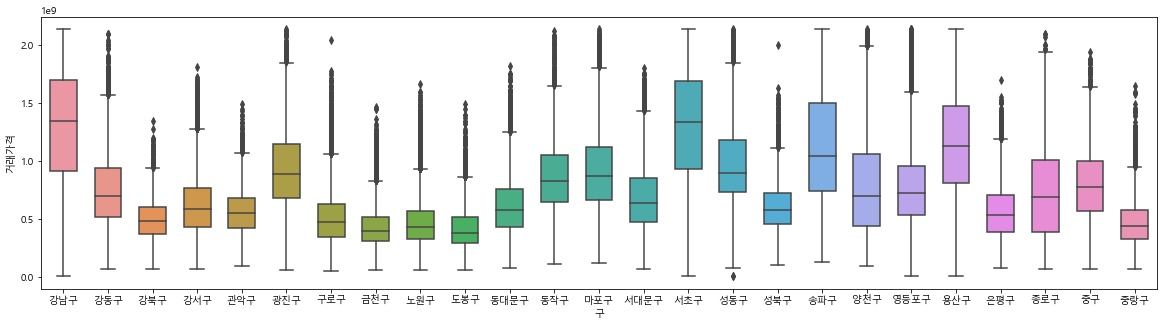

In [181]:
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
fig.set_size_inches(20,5)
sns.boxplot(x=transaction["구"], y=transaction["price2"], data=transaction, 
                saturation=0.75, width=0.6,
                fliersize=5)

ax.set(xlabel='구', ylabel='거래가격')



In [184]:
def record_gangnam(gu):
    if gu=='강남구':
        return 1
    elif gu=='서초구':
        return 1
    elif gu=='송파구':
        return 1
    elif gu=='마포구':
        return 2
    elif gu=='용산구':
        return 2
    elif gu=='성동구':
        return 2
    else:
        return 0

    
transaction["gangnam_color"]= transaction["구"].apply(record_gangnam)
transaction.head()

,Unnamed: 0,본번,부번,addr,load_addr,dong,bunji,floor,brand,build_area,...,year_built,years_use,load_name,price2,build_area_round,area_size,years_buckets,구,동,gangnam_color
0,0,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,4,개포6차우성아파트1동~8동,79.97,...,1987,35,언주로 3,1.300000e+09,80.0,x-small,25년 초과,강남구,개포동,1
1,1,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,2,개포6차우성아파트1동~8동,79.97,...,1987,35,언주로 3,1.170000e+09,80.0,x-small,25년 초과,강남구,개포동,1
2,2,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,1,개포6차우성아파트1동~8동,79.97,...,1987,35,언주로 3,1.300000e+09,80.0,x-small,25년 초과,강남구,개포동,1
3,3,652.0,0.0,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,서울특별시 강남구 개포동,652,12,개포우성3차,161.00,...,1984,38,개포로 307,2.100000e+09,161.0,small,25년 초과,강남구,개포동,1
4,4,12.0,2.0,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,서울특별시 강남구 개포동,12-2,16,개포자이(12-2),170.32,...,2004,18,개포로109길 69,1.620000e+09,170.0,medium,16년~20년이하,강남구,개포동,1


[Text(0.5, 0, '이외 / 강남3구 / 마용성'), Text(0, 0.5, '거래가격')]

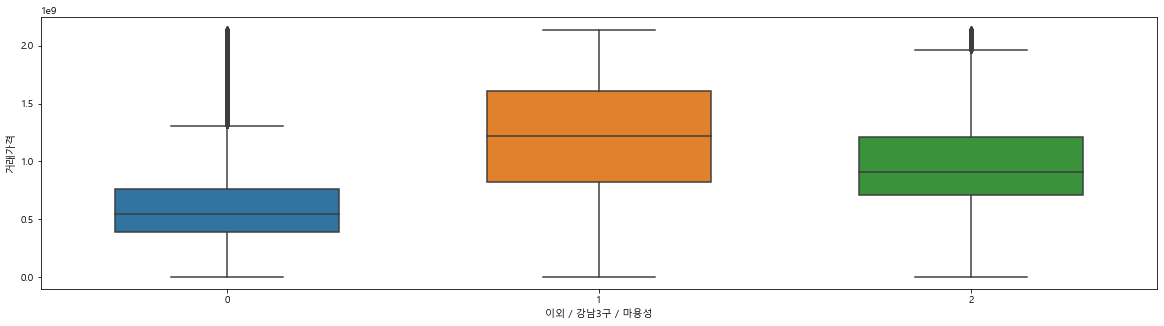

In [186]:
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
fig.set_size_inches(20,5)
sns.boxplot(x=transaction["gangnam_color"], y=transaction["price2"], data=transaction, 
                saturation=0.75, width=0.6,
                fliersize=5)

ax.set(xlabel='이외 / 강남3구 / 마용성', ylabel='거래가격')



In [187]:
by_year_gu= pd.DataFrame(data=transaction, columns=["contract_year", "구", "동","price"])

In [195]:
df= by_year_gu.groupby(["contract_year","구"]).mean(["price"])
df=df.reset_index()

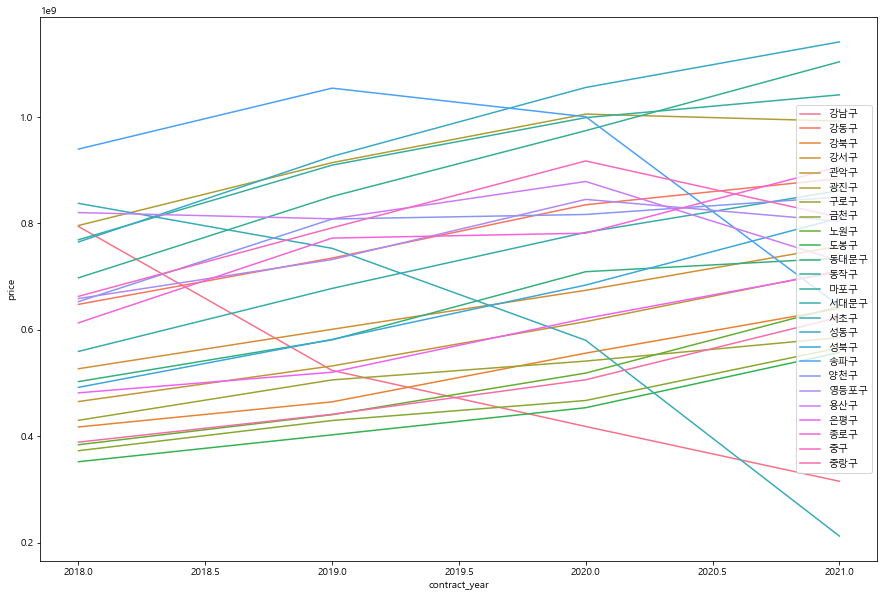

In [204]:
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
fig.set_size_inches(15,10)

sns.lineplot(x=df["contract_year"], y=df["price"], hue=df["구"], hue_norm=None)
plt.legend(loc='right')